In [1]:
from typing import Optional, Sequence, Mapping
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.DataFrame({'f1': [1, 2, 2, 3, 5], 'f2': [4, 4, 5, 6, 7], 'c': [1, 1, 0, 0, 0]})
df

,f1,f2,c
0,1,4,1
1,2,4,1
2,2,5,0
3,3,6,0
4,5,7,0


In [3]:
def process_features(X: pd.DataFrame, y_col: str)->Sequence[Mapping]:
    """
    :param X: data
    :param y_col: name of the label column in X
    :return:
    """
    features = []
    for n,t in X.dtypes.items():
        if n == y_col:
            continue
        f = {'name': n, 'dtype': t}
        features.append(f)
    return features

In [4]:
df = pd.DataFrame({'f1': ['s', 's', 'b', 's'], 'f2': [1, 1, 0, 0], 'f3': [1, 1, 0, 1], 'c': [1, 1, 0, 0]})
fs = process_features(df, 'c')
df

,f1,f2,f3,c
0,s,1,1,1
1,s,1,1,1
2,b,0,0,0
3,s,0,1,0


In [5]:
df = pd.DataFrame({'f1': ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'c'], 'f2': ['a', 'a', 'b', 'c', 'a', 'b', 'c', 'c', 'a', 'b'], 'c': [1, 1, 1, 0, 1, 0, 0, 0, 0, 0]})
fs = process_features(df, 'c')
df

,f1,f2,c
0,a,a,1
1,a,a,1
2,a,b,1
3,a,c,0
4,b,a,1
5,b,b,0
6,c,c,0
7,c,c,0
8,c,a,0
9,c,b,0


In [30]:
df = pd.DataFrame({'f1': ['a', 'a', 'a', 'a', 'b', 'b', 'c',], 'f2': ['a', 'a', 'b', 'c', 'a', 'b', 'c'], 'c': [1, 1, 1, 0, 0, 0, 0]})
fs = process_features(df, 'c')
df

,f1,f2,c
0,a,a,1
1,a,a,1
2,a,b,1
3,a,c,0
4,b,a,0
5,b,b,0
6,c,c,0


In [7]:
def split_on_feature(X: pd.DataFrame, feature: Mapping, y_col: str) -> Sequence[pd.Series]:
    """
    Returns gini index of the give feature
    :param X: data
    :param feature: the feature you want to use to get compute gini score
    :param y_col: name of the label column in X
    :return:
    """
    name = feature['name']
    if np.issubdtype(feature['dtype'], np.number):
        threshold = X[name].mean().item()

        print(threshold)
        
        ge = X[X[name] >= threshold]
        l = X[X[name] < threshold]

        return [ge, l]

    else:
        gb = X.groupby(name)
        return [gb.get_group(g) for g in gb.groups]

In [8]:
def entropy(X: pd.DataFrame, feature: Mapping, y_col: str) ->float:
    """
    Returns entropy score of the give feature
    :param X: data
    :param feature: the feature you want to use to get compute entropy score
    :param y_col: name of the label column in X
    :return:
    """
    def split_entropy(y: pd.Series):
        # print(y)
        ps = y.value_counts(normalize=True)
        # print(ps)
        return -(ps * np.log2(ps)).sum()

    len = X.shape[0]
    splits = split_on_feature(X, feature, y_col)
    print(splits)
    res = 0
    for split in splits:
        en = split_entropy(split)
        len_g = split.shape[0]
        res += len_g/len * en

    return res

In [32]:
asd = {}
for split in split_on_feature(df, fs[0], 'c'):
    print(split)
asd

  f1 f2  c
0  a  a  1
1  a  a  1
2  a  b  1
3  a  c  0
  f1 f2  c
4  b  a  0
5  b  b  0
  f1 f2  c
6  c  c  0


{}

In [36]:
for k in {"asd": 1, "dsa":2}:
    print()

ValueError: too many values to unpack (expected 2)

In [10]:
entropy(df, {'name': 'c', 'dtype': df['c'].dtypes}, 'c')

0.42857142857142855
[  f1 f2  c
0  a  a  1
1  a  a  1
2  a  b  1,   f1 f2  c
3  a  c  0
4  b  a  0
5  b  b  0
6  c  c  0]


1.536412500309067

In [11]:
random.sample([1, 2, 4, 5, 6], k=4)

[2, 4, 5, 6]

In [12]:
df.sample(10, replace=True)

,f1,f2,c
4,b,a,0
5,b,b,0
4,b,a,0
6,c,c,0
5,b,b,0
6,c,c,0
5,b,b,0
6,c,c,0
6,c,c,0
6,c,c,0


In [13]:
len(fs)

2

In [14]:
df = pd.read_csv('./data/train.csv', skipinitialspace = True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
df.dropna(inplace=True)

In [16]:
def read_data(path):
    data = pd.read_csv(path, skipinitialspace=True)
    return data

train_data = read_data('./data/train.csv')
test_data = read_data('./data/test.csv')
# YOU NEED TO HANDLE MISSING VALUES HERE
# ...

train_data.replace({r'\s*\?\s*': 'None' }, inplace=True, regex=True)
test_data.replace({r'\s*\?\s*': 'None', '50K.': '50K'}, inplace=True, regex=True)
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_data = train_data.apply(le.fit_transform)
test_data = test_data.apply(le.fit_transform)

train_X = train_data.drop(columns=['income'])
train_y = train_data['income']
test_X = test_data.drop(columns=['income'])
test_y = test_data['income']
train_X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,7,2671,9,12,4,0,1,4,1,25,0,39,39
1,33,6,2926,9,12,2,3,0,4,1,0,0,12,39
2,21,4,14086,11,8,0,5,1,4,1,0,0,39,39
3,36,4,15336,1,6,2,5,0,2,1,0,0,39,39
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,4,16528,7,11,2,13,5,4,0,0,0,37,39
32557,23,4,8080,11,8,2,6,0,4,1,0,0,39,39
32558,41,4,7883,11,8,6,0,4,4,0,0,0,39,39
32559,5,4,12881,11,8,4,0,3,4,1,0,0,19,39


In [17]:
train_y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=256, min_samples_split=2, max_features=14, n_estimators=10)
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.8404889134574043

In [19]:
clf.score(train_X, train_y)

0.9877153650072172

In [26]:
df.sample(df.shape[0], replace=True).index

Int64Index([14620, 20414, 20882, 17722, 26455, 26760,  9857, 19323, 30051,
            31834,
            ...
            27235, 28274, 12371, 11004, 24210, 15415, 16813, 19629, 27748,
            31749],
           dtype='int64', length=32561)

In [28]:
df['marital-status'].unique().shape

(7,)

In [55]:
asd = np.array(random.sample(range(1, 100), 10))
dsa = np.arange(1, 11)

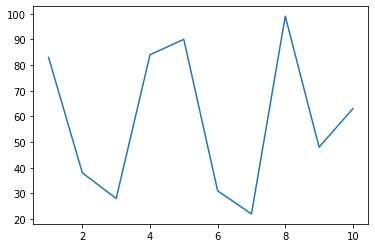

In [57]:
import matplotlib.pyplot as plt
ax = plt.plot(dsa, asd)
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.set_title('Random Forest Accuracy vs Max Depth')
plt.savefig('asd.png')
